In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import requests
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats

# settings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [4]:
def get_listings(api_key, listing_url):
    url = "https://app.scrapeak.com/v1/scrapers/zillow/listing"

    querystring = {
        "api_key": api_key,
        "url":listing_url
    }

    return requests.request("GET", url, params=querystring)

def get_property_detail(api_key, zpid):
    url = "https://app.scrapeak.com/v1/scrapers/zillow/property"

    querystring = {
        "api_key": api_key,
        "zpid":zpid
    }

    return requests.request("GET", url, params=querystring)

def get_zpid(api_key, street, city, state, zip_code=None):
    url = "https://app.scrapeak.com/v1/scrapers/zillow/zpidByAddress"

    querystring = {
        "api_key": api_key,
        "street": street,
        "city": city,
        "state": state,
        "zip_code":zip_code
    }

    return requests.request("GET", url, params=querystring)

In [2]:
# get keys
#api_key = 

# 1. Property Listings For Sale


In [6]:
# zillow search url
listing_url = 'https://www.zillow.com/homes/for_rent/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A47.70341199863261%2C%22east%22%3A-122.15685364590797%2C%22south%22%3A47.51639297939457%2C%22west%22%3A-122.43700501309547%7D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22days%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22fr%22%3A%7B%22value%22%3Atrue%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%2C%22customRegionId%22%3A%223479c645f2X1-CRm9e7oxd4vrut_1d7alh%22%7D'

# get listings
listing_response = get_listings(api_key, listing_url)

In [7]:
# view all keys
listing_response.json().keys()

dict_keys(['is_success', 'data', 'message'])

In [ ]:
#listing_response.json()['data']

In [9]:
# check if request is successful
listing_response.json()["is_success"]

True

In [10]:
# view count of properies returned in request
num_of_properties = listing_response.json()["data"]["categoryTotals"]["cat1"]["totalResultCount"]
print("Count of properties:", num_of_properties)

Count of properties: 1879


In [11]:
# view all listings
df_listings = pd.json_normalize(listing_response.json()["data"]["cat1"]["searchResults"]["mapResults"])
print("Number of rows:", len(df_listings))
print("Number of columns:", len(df_listings.columns))
#df_listings.head()

Number of rows: 500
Number of columns: 82


,buildingId,lotId,price,minBeds,minBaths,minArea,imgSrc,hasImage,plid,isFeaturedListing,isShowcaseListing,unitCount,isHomeRec,buildingName,isBuilding,address,badgeInfo,statusType,statusText,listingType,isFavorite,detailUrl,has3DModel,hasAdditionalAttributions,canSaveBuilding,timeOnZillow,latLong.latitude,latLong.longitude,variableData.type,variableData.text,zpid,priceLabel,beds,baths,area,isUserClaimingOwner,isUserConfirmedClaim,visited,shouldShowZestimateAsPrice,pgapt,sgapt,hasVideo,availabilityDate,variableData.data.isFresh,hdpData.homeInfo.zpid,hdpData.homeInfo.zipcode,hdpData.homeInfo.city,hdpData.homeInfo.state,hdpData.homeInfo.latitude,hdpData.homeInfo.longitude,hdpData.homeInfo.price,hdpData.homeInfo.bathrooms,hdpData.homeInfo.bedrooms,hdpData.homeInfo.livingArea,hdpData.homeInfo.homeType,hdpData.homeInfo.homeStatus,hdpData.homeInfo.daysOnZillow,hdpData.homeInfo.isFeatured,hdpData.homeInfo.shouldHighlight,hdpData.homeInfo.isRentalWithBasePrice,hdpData.homeInfo.rentZestimate,hdpData.homeInfo.isUnmappable,hdpData.homeInfo.isPreforeclosureAuction,hdpData.homeInfo.homeStatusForHDP,hdpData.homeInfo.priceForHDP,hdpData.homeInfo.isNonOwnerOccupied,hdpData.homeInfo.isPremierBuilder,hdpData.homeInfo.isZillowOwned,hdpData.homeInfo.currency,hdpData.homeInfo.country,hdpData.homeInfo.unit,hdpData.homeInfo.isShowcaseListing,badgeInfo.type,badgeInfo.text,info3String,hdpData.homeInfo.taxAssessedValue,hdpData.homeInfo.zestimate,hdpData.homeInfo.datePriceChanged,hdpData.homeInfo.priceReduction,hdpData.homeInfo.priceChange,streetViewMetadataURL,streetViewURL
0,47.608837--122.329796,2.568098e+09,"$1,594+/mo",0.0,1.0,381.0,https://photos.zillowstatic.com/fp/ba59ebf5017...,True,4bn3dwybmdx6s,True,False,82.0,False,Ovation,True,"702 Spring St, Seattle, WA",NaN,FOR_RENT,Ovation,,False,/apartments/seattle-wa/ovation/C6TSyz/,True,False,True,255053,47.608837,-122.329796,3D_HOME,3D Tour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47.66923--122.37912,2.121464e+09,"$2,044+/mo",0.0,1.0,516.0,https://photos.zillowstatic.com/fp/aa30162fa9d...,True,578fpyhac2hb7,True,False,12.0,False,Valdok,True,"1701 NW 56th St, Seattle, WA",NaN,FOR_RENT,Valdok,,False,/apartments/seattle-wa/valdok/9W29DK/,True,False,True,292502,47.669230,-122.379120,3D_HOME,3D Tour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,"$3,532/mo",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/346a6a4cfe8...,True,NaN,True,False,NaN,False,NaN,NaN,--,NaN,FOR_RENT,Apartment for rent,,False,/apartments/seattle-wa/via-6/5XqWDb/,False,False,NaN,560420,47.615166,-122.340060,TIME_ON_INFO,9 minutes ago,2091689363,$3.5K,2.0,2.0,1027.0,False,False,False,False,ForRent,For Rent,False,2023-06-15 00:00:00,True,2.091689e+09,98121,Seattle,WA,47.615166,-122.34006,3532.0,2.0,2.0,1027.0,APARTMENT,FOR_RENT,-1.0,True,False,False,3542.0,False,False,FOR_RENT,3532.0,True,False,False,USD,USA,Apt S303,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47.60968--122.32976,1.144635e+09,"$1,590+/mo",0.0,1.0,465.0,https://photos.zillowstatic.com/fp/88644d93cbc...,True,1pnaenbwh5qpf,True,False,39.0,False,Cielo,True,"800 Seneca St, Seattle, WA",NaN,FOR_RENT,Cielo,,False,/apartments/seattle-wa/cielo/64YFjs/,False,False,True,587686,47.609680,-122.329760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47.61676--122.3469,1.001473e+09,"$1,481+/mo",0.0,1.0,465.0,https://photos.zillowstatic.com/fp/9f74a356522...,True,33d2k6ad08w84,True,False,22.0,False,Centennial Tower and Court,True,"2515 4th Ave, Seattle, WA",NaN,FOR_RENT,Centennial Towe

# filter out all the listings that has only has both missing, will keep row if only one is missing

In [12]:
df_listings1 = df_listings.dropna(subset=['hdpData.homeInfo.zestimate','hdpData.homeInfo.rentZestimate'], how='all')
#df_listings1.head()


,buildingId,lotId,price,minBeds,minBaths,minArea,imgSrc,hasImage,plid,isFeaturedListing,isShowcaseListing,unitCount,isHomeRec,buildingName,isBuilding,address,badgeInfo,statusType,statusText,listingType,isFavorite,detailUrl,has3DModel,hasAdditionalAttributions,canSaveBuilding,timeOnZillow,latLong.latitude,latLong.longitude,variableData.type,variableData.text,zpid,priceLabel,beds,baths,area,isUserClaimingOwner,isUserConfirmedClaim,visited,shouldShowZestimateAsPrice,pgapt,sgapt,hasVideo,availabilityDate,variableData.data.isFresh,hdpData.homeInfo.zpid,hdpData.homeInfo.zipcode,hdpData.homeInfo.city,hdpData.homeInfo.state,hdpData.homeInfo.latitude,hdpData.homeInfo.longitude,hdpData.homeInfo.price,hdpData.homeInfo.bathrooms,hdpData.homeInfo.bedrooms,hdpData.homeInfo.livingArea,hdpData.homeInfo.homeType,hdpData.homeInfo.homeStatus,hdpData.homeInfo.daysOnZillow,hdpData.homeInfo.isFeatured,hdpData.homeInfo.shouldHighlight,hdpData.homeInfo.isRentalWithBasePrice,hdpData.homeInfo.rentZestimate,hdpData.homeInfo.isUnmappable,hdpData.homeInfo.isPreforeclosureAuction,hdpData.homeInfo.homeStatusForHDP,hdpData.homeInfo.priceForHDP,hdpData.homeInfo.isNonOwnerOccupied,hdpData.homeInfo.isPremierBuilder,hdpData.homeInfo.isZillowOwned,hdpData.homeInfo.currency,hdpData.homeInfo.country,hdpData.homeInfo.unit,hdpData.homeInfo.isShowcaseListing,badgeInfo.type,badgeInfo.text,info3String,hdpData.homeInfo.taxAssessedValue,hdpData.homeInfo.zestimate,hdpData.homeInfo.datePriceChanged,hdpData.homeInfo.priceReduction,hdpData.homeInfo.priceChange,streetViewMetadataURL,streetViewURL
2,NaN,NaN,"$3,532/mo",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/346a6a4cfe8...,True,NaN,True,False,NaN,False,NaN,NaN,--,NaN,FOR_RENT,Apartment for rent,,False,/apartments/seattle-wa/via-6/5XqWDb/,False,False,NaN,560420,47.615166,-122.340060,TIME_ON_INFO,9 minutes ago,2091689363,$3.5K,2.0,2.0,1027.0,False,False,False,False,ForRent,For Rent,False,2023-06-15 00:00:00,True,2.091689e+09,98121,Seattle,WA,47.615166,-122.340060,3532.0,2.0,2.0,1027.0,APARTMENT,FOR_RENT,-1.0,True,False,False,3542.0,False,False,FOR_RENT,3532.0,True,False,False,USD,USA,Apt S303,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,"$2,400/mo",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/c8b9acc6eb9...,True,NaN,True,False,NaN,False,NaN,NaN,--,NaN,FOR_RENT,Apartment for rent,,False,/b/louisa-apartments-seattle-wa-CDVMVR/,False,False,NaN,6184109,47.642030,-122.326000,TIME_ON_INFO,1 hour ago,2058120898,$2.4K,2.0,1.0,810.0,False,False,False,False,ForRent,For Rent,False,2023-05-10 00:00:00,True,2.058121e+09,98102,Seattle,WA,47.642030,-122.326000,2400.0,1.0,2.0,810.0,APARTMENT,FOR_RENT,-1.0,True,False,False,2550.0,False,False,FOR_RENT,2400.0,True,False,False,USD,USA,# 217,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,"$1,750/mo",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/c128d9b5e25...,True,NaN,False,False,NaN,False,NaN,NaN,--,NaN,FOR_RENT,Apartment for rent,,False,/homedetails/3801-S-Alaska-St-APT-104-Seattle-...,False,False,NaN,7447286,47.560432,-122.284485,TIME_ON_INFO,2 hours ago,2077070982,$1.8K,1.0,1.0,805.0,False,False,False,False,ForRent,For Rent,False,2023-06-01 00:00:00,True,2.077071e+09,98118,Seattle,WA,47.560432,-122.284485,1750.0,1.0,1.0,805.0,APARTMENT,FOR_RENT,-1.0,False,False,False,2238.0,False,False,FOR_RENT,1750.0,True,False,False,USD,USA,Apt 104,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,"$2,000/mo",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/66cab80959e...,True,NaN,False,False,NaN,False,NaN,NaN,--,NaN,FOR_RENT,Apartment for rent,,False,/homedetails/3114-3rd-Ave-W-Seattle-WA-98119/4...,False,False,NaN,8679145,47.648310,-122.360530,TIME_ON_INFO,2 hours ago,48771686,$2.0K,2.0,1.0,900.0,False,False,False,False,ForRent,For Rent,False,2023-09-02 00:00:00,True,4.877169e+07,98119,Seattle,WA,47.648310,-122.360530,2000.0,1.0,2.0,900.0,APARTMENT,FOR_RENT,-1.0,False,False,False,2394.0,False,False,FOR_RENT,2000.0,True,False,False,USD,USA,NaN,False,NaN,NaN,NaN,994000.0,NaN

In [13]:
df_listings1 = df_listings1[~df_listings1['price'].str.contains('K')]
df_listings1 = df_listings1[~(df_listings1['area'].isnull() | (df_listings1['area'] == 0.0))]
#df_listings1

,buildingId,lotId,price,minBeds,minBaths,minArea,imgSrc,hasImage,plid,isFeaturedListing,isShowcaseListing,unitCount,isHomeRec,buildingName,isBuilding,address,badgeInfo,statusType,statusText,listingType,isFavorite,detailUrl,has3DModel,hasAdditionalAttributions,canSaveBuilding,timeOnZillow,latLong.latitude,latLong.longitude,variableData.type,variableData.text,zpid,priceLabel,beds,baths,area,isUserClaimingOwner,isUserConfirmedClaim,visited,shouldShowZestimateAsPrice,pgapt,sgapt,hasVideo,availabilityDate,variableData.data.isFresh,hdpData.homeInfo.zpid,hdpData.homeInfo.zipcode,hdpData.homeInfo.city,hdpData.homeInfo.state,hdpData.homeInfo.latitude,hdpData.homeInfo.longitude,hdpData.homeInfo.price,hdpData.homeInfo.bathrooms,hdpData.homeInfo.bedrooms,hdpData.homeInfo.livingArea,hdpData.homeInfo.homeType,hdpData.homeInfo.homeStatus,hdpData.homeInfo.daysOnZillow,hdpData.homeInfo.isFeatured,hdpData.homeInfo.shouldHighlight,hdpData.homeInfo.isRentalWithBasePrice,hdpData.homeInfo.rentZestimate,hdpData.homeInfo.isUnmappable,hdpData.homeInfo.isPreforeclosureAuction,hdpData.homeInfo.homeStatusForHDP,hdpData.homeInfo.priceForHDP,hdpData.homeInfo.isNonOwnerOccupied,hdpData.homeInfo.isPremierBuilder,hdpData.homeInfo.isZillowOwned,hdpData.homeInfo.currency,hdpData.homeInfo.country,hdpData.homeInfo.unit,hdpData.homeInfo.isShowcaseListing,badgeInfo.type,badgeInfo.text,info3String,hdpData.homeInfo.taxAssessedValue,hdpData.homeInfo.zestimate,hdpData.homeInfo.datePriceChanged,hdpData.homeInfo.priceReduction,hdpData.homeInfo.priceChange,streetViewMetadataURL,streetViewURL
2,NaN,NaN,"$3,532/mo",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/346a6a4cfe8...,True,NaN,True,False,NaN,False,NaN,NaN,--,NaN,FOR_RENT,Apartment for rent,,False,/apartments/seattle-wa/via-6/5XqWDb/,False,False,NaN,560420,47.615166,-122.340060,TIME_ON_INFO,9 minutes ago,2091689363,$3.5K,2.0,2.0,1027.0,False,False,False,False,ForRent,For Rent,False,2023-06-15 00:00:00,True,2.091689e+09,98121,Seattle,WA,47.615166,-122.340060,3532.0,2.0,2.0,1027.0,APARTMENT,FOR_RENT,-1.0,True,False,False,3542.0,False,False,FOR_RENT,3532.0,True,False,False,USD,USA,Apt S303,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,"$2,400/mo",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/c8b9acc6eb9...,True,NaN,True,False,NaN,False,NaN,NaN,--,NaN,FOR_RENT,Apartment for rent,,False,/b/louisa-apartments-seattle-wa-CDVMVR/,False,False,NaN,6184109,47.642030,-122.326000,TIME_ON_INFO,1 hour ago,2058120898,$2.4K,2.0,1.0,810.0,False,False,False,False,ForRent,For Rent,False,2023-05-10 00:00:00,True,2.058121e+09,98102,Seattle,WA,47.642030,-122.326000,2400.0,1.0,2.0,810.0,APARTMENT,FOR_RENT,-1.0,True,False,False,2550.0,False,False,FOR_RENT,2400.0,True,False,False,USD,USA,# 217,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,"$1,750/mo",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/c128d9b5e25...,True,NaN,False,False,NaN,False,NaN,NaN,--,NaN,FOR_RENT,Apartment for rent,,False,/homedetails/3801-S-Alaska-St-APT-104-Seattle-...,False,False,NaN,7447286,47.560432,-122.284485,TIME_ON_INFO,2 hours ago,2077070982,$1.8K,1.0,1.0,805.0,False,False,False,False,ForRent,For Rent,False,2023-06-01 00:00:00,True,2.077071e+09,98118,Seattle,WA,47.560432,-122.284485,1750.0,1.0,1.0,805.0,APARTMENT,FOR_RENT,-1.0,False,False,False,2238.0,False,False,FOR_RENT,1750.0,True,False,False,USD,USA,Apt 104,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,"$2,000/mo",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/66cab80959e...,True,NaN,False,False,NaN,False,NaN,NaN,--,NaN,FOR_RENT,Apartment for rent,,False,/homedetails/3114-3rd-Ave-W-Seattle-WA-98119/4...,False,False,NaN,8679145,47.648310,-122.360530,TIME_ON_INFO,2 hours ago,48771686,$2.0K,2.0,1.0,900.0,False,False,False,False,ForRent,For Rent,False,2023-09-02 00:00:00,True,4.877169e+07,98119,Seattle,WA,47.648310,-122.360530,2000.0,1.0,2.0,900.0,APARTMENT,FOR_RENT,-1.0,False,False,False,2394.0,False,False,FOR_RENT,2000.0,True,False,False,USD,USA,NaN,False,NaN,NaN,NaN,994000.0,NaN

In [14]:
print(df_listings1.shape)

(154, 82)


In [15]:
# view all listings
print("Number of rows:", len(df_listings1))
print("Number of columns:", len(df_listings1))

Number of rows: 154
Number of columns: 154


# Filter out all the lisitings that has zestimate and rent_zestimate as null


In [3]:
df_listings_filtered = df_listings.dropna(subset=['hdpData.homeInfo.zestimate','hdpData.homeInfo.rentZestimate','beds','baths'])

#df_listings_filtered

NameError: name 'df_listings' is not defined

In [17]:
# view all listings
print("Number of rows:", len(df_listings_filtered))
print("Number of columns:", len(df_listings_filtered.columns))

Number of rows: 74
Number of columns: 82


# filling in the missing zestimates



In [18]:
x = df_listings_filtered['hdpData.homeInfo.rentZestimate']
y = df_listings_filtered['hdpData.homeInfo.zestimate']

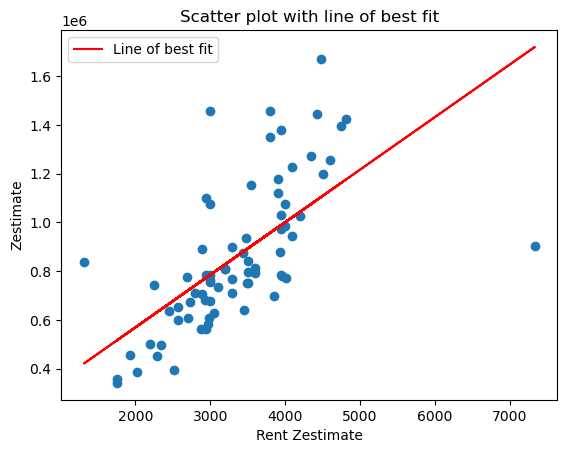

In [19]:
# Calculate the slope and intercept of the line of best fit
slope,intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create a scatter plot with the line of best fit
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'r', label='Line of best fit')
plt.xlabel('Rent Zestimate')
plt.ylabel('Zestimate')
plt.title('Scatter plot with line of best fit')
plt.legend()
plt.show()


In [20]:
# Predict the y value for a given x value
def predict_zestimate(x_pred):
    y_pred = intercept + slope * x_pred
    return y_pred
x_pred = 1200
print(f"The predicted Zestimate for a Rent Zestimate of {x_pred} is {predict_zestimate(x_pred)}")

The predicted Zestimate for a Rent Zestimate of 1200 is 396488.68615278427


In [21]:
#df_listings1['price']

2      $3,532/mo
15     $2,400/mo
16     $1,750/mo
19     $2,000/mo
21     $3,490/mo
         ...    
489    $3,300/mo
493    $1,225/mo
497    $3,170/mo
498    $4,500/mo
499    $3,795/mo
Name: price, Length: 154, dtype: object

In [22]:
# Looping through the rows in missing_zestimate_df then using the functions above to predict the missing zestimate value based on corresponding rent_zestimate value. 
# The predicted value is then inserted into the df_listings DataFrame using the loc[] method.

#df_listing1 is the df with just one missing
# Filter out rows where hdpData.homeInfo.zestimate is missing
df_missing_zestimate = df_listings1[df_listings1['hdpData.homeInfo.zestimate'].isnull()]

# Loop through each row in the filtered DataFrame and fill in missing values with predicted values
for index, row in df_missing_zestimate.iterrows():
    x = row['hdpData.homeInfo.rentZestimate']
    y_pred = predict_zestimate(x)
    df_listings1.loc[index, 'hdpData.homeInfo.zestimate'] = y_pred

        
# Create a new DataFrame with selected columns
houses_df = pd.DataFrame()
houses_df['zpid'] = df_listings1['zpid']
houses_df['price'] = df_listings1['price']
houses_df['beds'] = df_listings1['beds']
houses_df['baths'] = df_listings1['baths']
houses_df['sqft'] = df_listings1['area']
houses_df['detailUrl'] = df_listings1['detailUrl']
houses_df['days on Zillow'] = df_listings1['timeOnZillow'] / 86400
houses_df['zipcode'] = df_listings1['hdpData.homeInfo.zipcode']
houses_df['city'] = df_listings1['hdpData.homeInfo.city']
houses_df['state'] = df_listings1['hdpData.homeInfo.state']
houses_df['homeType'] = df_listings1['hdpData.homeInfo.homeType']
houses_df['zestimate'] = df_listings1['hdpData.homeInfo.zestimate']
houses_df['rent Zestimate'] = df_listings1['hdpData.homeInfo.rentZestimate']
houses_df['price change'] = df_listings1['hdpData.homeInfo.priceChange']
houses_df['price'] = houses_df['price'].str.replace('[^0-9]', '').astype(float)
houses_df['discount'] = (houses_df['price change'] / (houses_df['price'] - houses_df['price change']))





In [24]:
# set the display options to show all rows
pd.set_option('display.max_rows', None)
#houses_df['price'].mean()

2897.512987012987

In [25]:
#pd.set_option('display.max_rows', None)
#houses_df.sort_values(by='discount',ascending=True)

,zpid,price,beds,baths,sqft,detailUrl,days on Zillow,zipcode,city,state,homeType,zestimate,rent Zestimate,price change,discount
257,2080057604,1375.0,1.0,1.0,520.0,/homedetails/1207-NW-92nd-St-Seattle-WA-98117/...,1602.790023,98117,Seattle,WA,APARTMENT,4.942241e+05,1653.0,-420.0,-0.233983
202,2057921124,4000.0,3.0,2.5,1600.0,/homedetails/1781-NW-87th-St-Seattle-WA-98117/...,1151.846910,98117,Seattle,WA,SINGLE_FAMILY,1.026900e+06,4200.0,-950.0,-0.191919
365,2085067008,1595.0,1.0,1.0,800.0,/homedetails/2705-S-King-St-B-Seattle-WA-98144...,2219.421667,98144,Seattle,WA,APARTMENT,6.618631e+05,2430.0,-200.0,-0.111421
464,63339105,2000.0,1.0,1.0,640.0,/homedetails/1601-Taylor-Ave-N-APT-402-Seattle...,2908.109097,98109,Seattle,WA,APARTMENT,6.450344e+05,2352.0,-200.0,-0.090909
209,2081242386,1700.0,1.0,1.0,800.0,/homedetails/2144-Waverly-Pl-N-APT-6-Seattle-W...,1189.015833,98109,Seattle,WA,APARTMENT,6.271271e+05,2269.0,-100.0,-0.055556
482,2084303478,4250.0,3.0,2.0,1585.0,/homedetails/818-NW-53rd-St-A-Seattle-WA-98107...,2989.655058,98107,Seattle,WA,APARTMENT,9.992985e+05,3994.0,-250.0,-0.055556
326,2060171957,1895.0,2.0,1.0,710.0,/homedetails/1201-S-Judkins-St-1201-Seattle-WA...,2061.528519,98144,Seattle,WA,APARTMENT,5.680112e+05,1995.0,-100.0,-0.050125
214,2080981131,2100.0,1.0,1.0,800.0,/homedetails/2308-W-Wheeler-St-APT-3-Seattle-W...,1254.904792,98199,Seattle,WA,APARTMENT,5.677954e+05,1994.0,-100.0,-0.045455
254,121994085,4500.0,2.0,2.0,1470.0,/homedetails/2218B-Yale-Ave-E-Seattle-WA-98102...,1602.645949,98102,Seattle,WA,TOWNHOUSE,1.176600e+06,3900.0,-200.0,-0.042553
330,2060261337,1595.0,1.0,1.0,650.0,/homedetails/1211-S-Judkins-St-1203-Seattle-WA...,2083.763461,98144,Seattle,WA,APARTMENT,5.393162e+05,1862.0,-55.0,-0.033333


In [4]:
houses_df.head()

NameError: name 'houses_df' is not defined

# My Linear Regression Model using sklearn

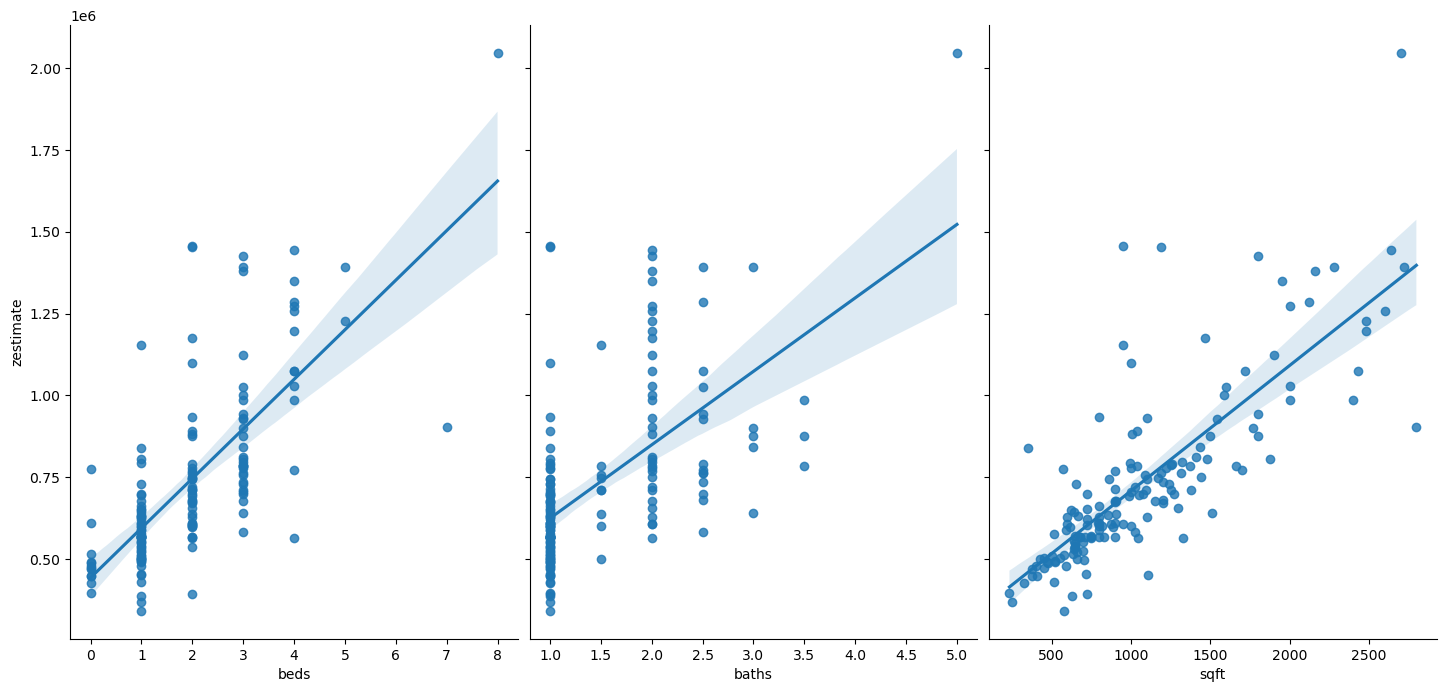

In [185]:
sns.pairplot(houses_df, x_vars = ['beds','baths','sqft'], y_vars='zestimate', size=7, aspect = 0.7, kind='reg')

In [48]:
feature_cols = ['price','baths','beds']

X = houses_df[feature_cols]

#X


,price,baths,beds
2,3532.0,2.0,2.0
15,2400.0,1.0,2.0
16,1750.0,1.0,1.0
19,2000.0,1.0,2.0
21,3490.0,2.0,2.0
23,4995.0,2.0,3.0
29,2990.0,1.0,1.0
30,3295.0,2.0,3.0
31,5200.0,2.0,4.0
32,2165.0,2.0,2.0


In [49]:
X.shape

(154, 3)

In [50]:
y = houses_df['sqft']
y.head()

2     1027.0
15     810.0
16     805.0
19     900.0
21    1045.0
Name: sqft, dtype: float64

In [51]:
y.shape

(154,)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [53]:
X_train.shape

(115, 3)

In [54]:
X_test.shape


(39, 3)

In [55]:

y_train.shape

(115,)

In [56]:

y_test.shape

(39,)

In [57]:
#import model
#instantiate
linreg = LinearRegression()

#fit the model to the training data
linreg.fit(X_train, y_train)

LinearRegression()

In [58]:
print(linreg.intercept_)

19.434566892088924


In [59]:
print(linreg.coef_)

[  0.21453261  56.73907023 186.36320527]


In [60]:
y_pred = linreg.predict(X_test)

In [61]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

217.7355703293509


In [62]:
normalized_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / (y_test.max() - y_test.min())
print(normalized_rmse)

0.10222327245509433


In [65]:
new_house = pd.DataFrame({ 'price': [3000], 'baths': [1], 'beds': [2]})

In [66]:
linreg.predict(new_house)

array([1092.49786384])